In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import datasets

In [ ]:
rest_dataset = datasets.fetch_development_fmri(n_subjects=30)

In [40]:
func_filenames = rest_dataset.func  # list of 4D nifti files for each subject
print('First functional nifti image (4D) is at: %s' %
      rest_dataset.func[0]) 

First functional nifti image (4D) is at: C:\Users\Amin/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


In [16]:
from nilearn.decomposition import CanICA

In [ ]:
canica = CanICA(n_components=20,
                memory="nilearn_cache", memory_level=2,
                verbose=10,
                mask_strategy='whole-brain-template',
                random_state=0)
canica.fit(func_filenames)

# Retrieve the independent components in brain space. Directly
# accessible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('canica_resting_state.nii.gz')

c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\nilearn\plotting\displays\_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
c:\Users\Amin\AppData\Local\Programs\Python\Python39\lib\nilearn\plotting\displays\_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


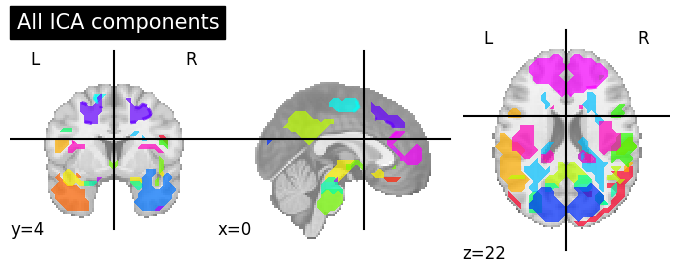

In [52]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(canica_components_img, title='All ICA components')

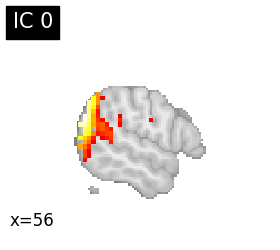

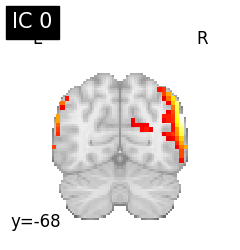

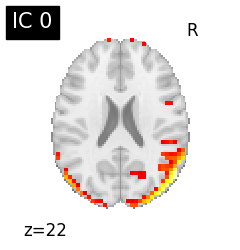

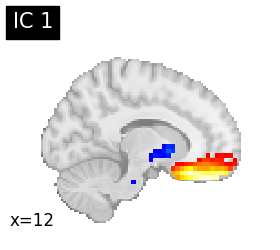

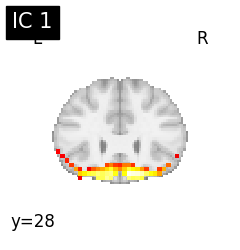

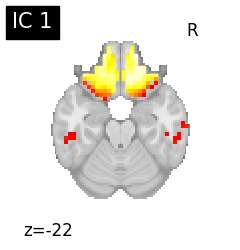

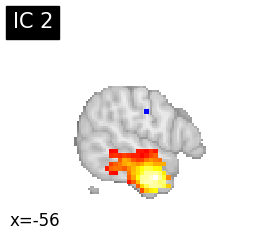

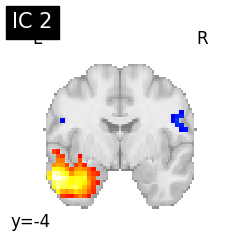

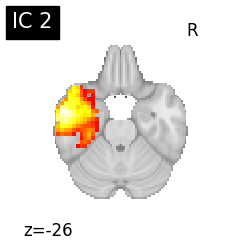

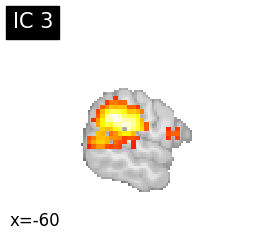

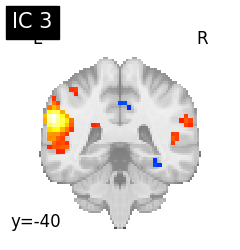

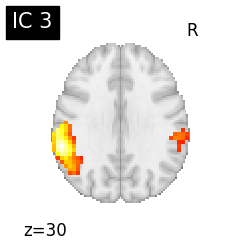

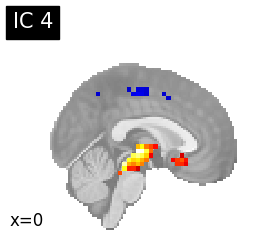

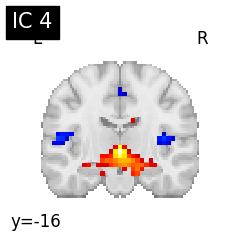

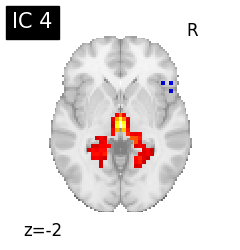

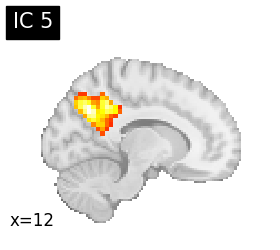

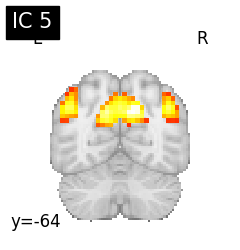

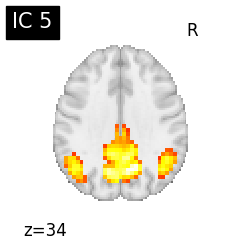

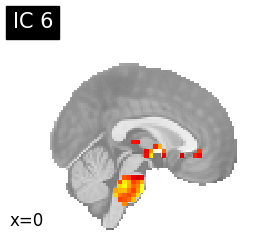

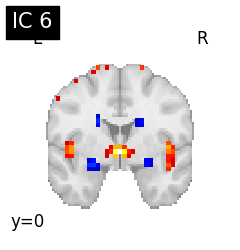

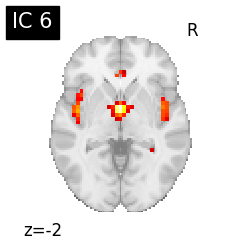

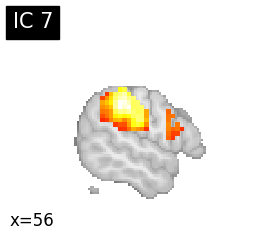

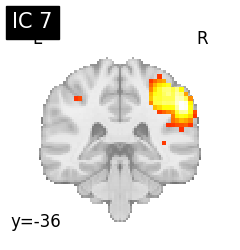

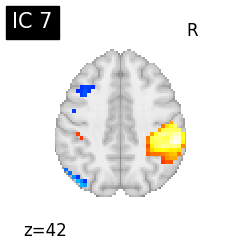

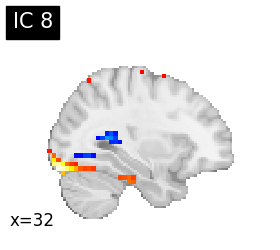

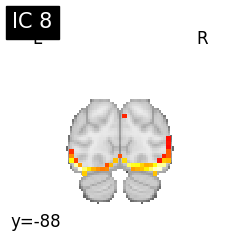

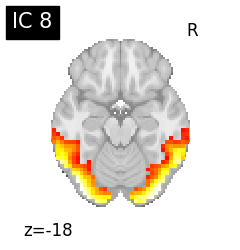

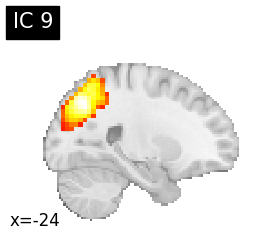

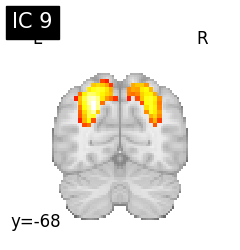

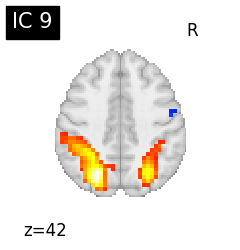

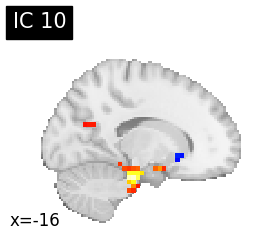

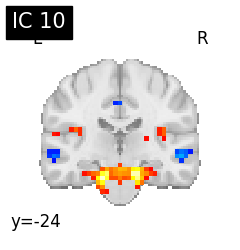

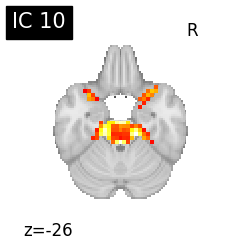

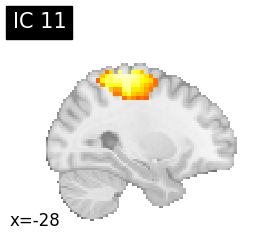

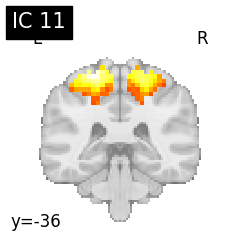

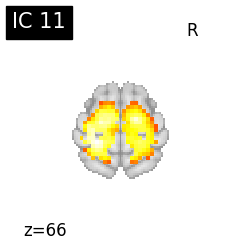

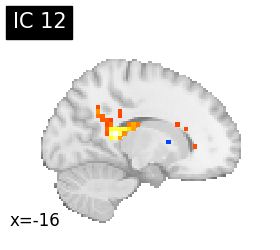

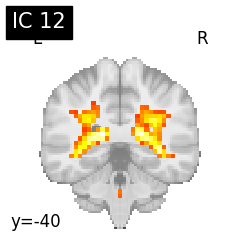

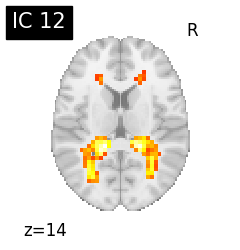

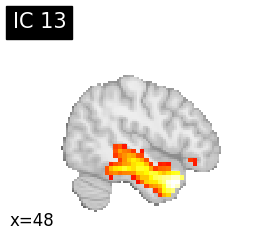

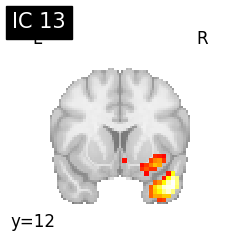

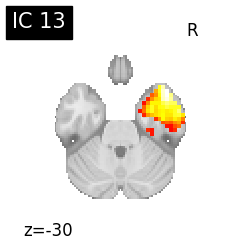

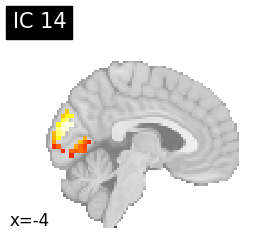

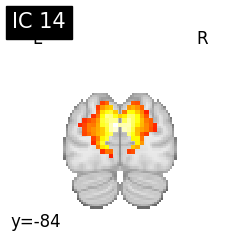

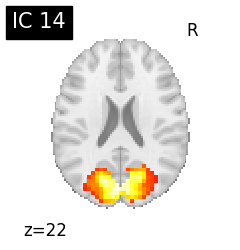

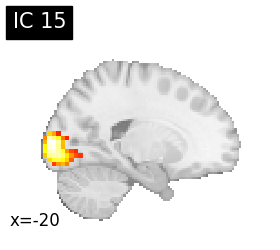

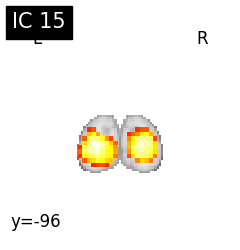

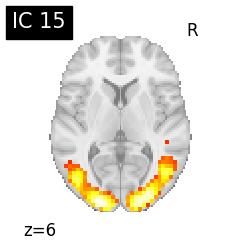

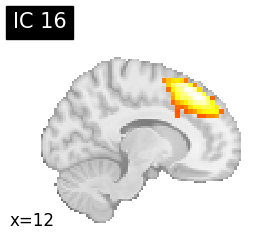

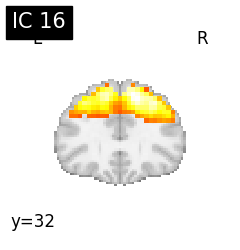

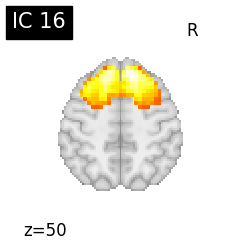

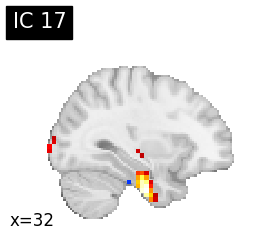

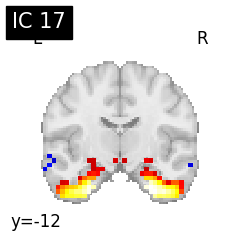

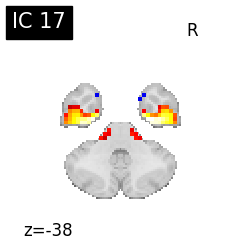

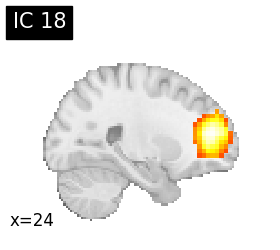

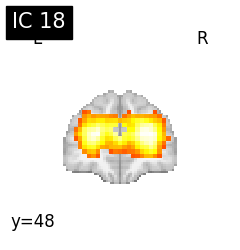

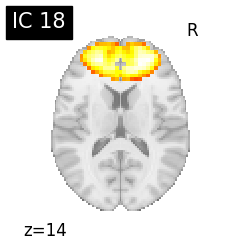

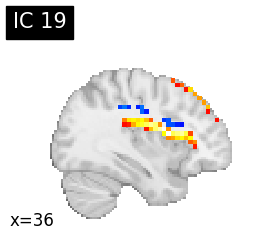

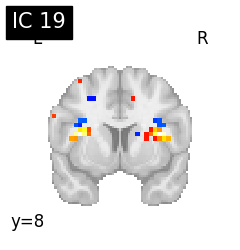

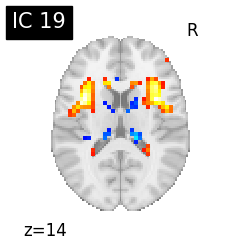

In [54]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(cur_img, display_mode="x", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
                 
    plot_stat_map(cur_img, display_mode="y", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
                 
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
